# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [37]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [20]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male'] #this is the same thing as data[data['Gender']=='Male']
female_df =  data.loc[data['Gender'] == 'Female']


# print('Male Height mean:', male_df.Height.mean())
# print('Male Height sd:', male_df.Height.std())      

# print('Male Weight mean:', male_df.Weight.mean())
# print('Male Weight sd:' ,male_df.Weight.std())   

# print('Female Height mean:', female_df.Height.mean())
# print('Female Height sd:' ,female_df.Height.std())      

# print('Female Weight mean:', female_df.Weight.mean())
# print('Female Weight sd:' ,female_df.Weight.std()) 

data.head() 
# male_data = data[data['Gender']=='Male']

print(female_df.describe() , male_df.describe())
# female_df.describe()
# male_data.describe()
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

            Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214             Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

C:\Users\Devindra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


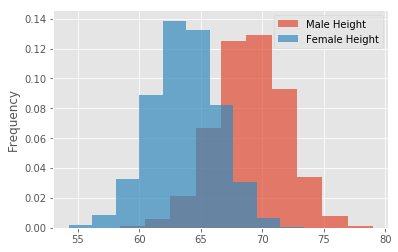

In [26]:
binsize = 10 #setting the size of the bin, i can also do this in the plot.hist itself like: "plot.hist(bins = 10...)"
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Height');
plt.legend()

In [ ]:
# Record your observations - are these inline with your personal observations?

'This looks like a fairly normal distribution. There are measurable overlaps within the 60-70 inch range. Also, a lifetime of being primed to think that blue is for boys caused me to misread the graph for a sec'

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

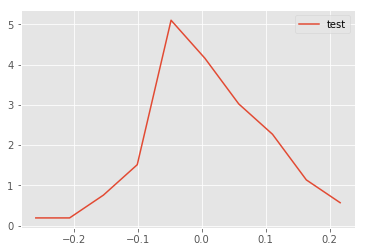

In [38]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

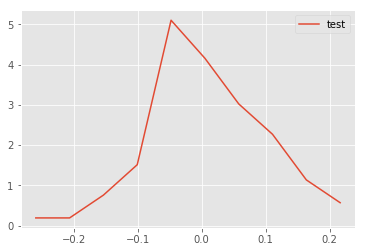

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

C:\Users\Devindra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Devindra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


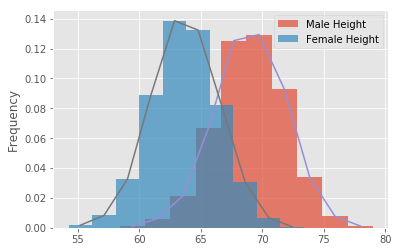

In [42]:
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)

#### Repeat above exerice for male and female weights

C:\Users\Devindra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Devindra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


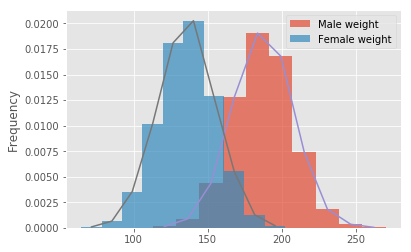

In [41]:
male_df.Weight.plot.hist(bins = binsize, normed = True,  alpha = 0.7, label ="Male weight");
female_df.Weight.plot.hist(bins = binsize, normed = True, alpha = 0.7, label = 'Female weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)

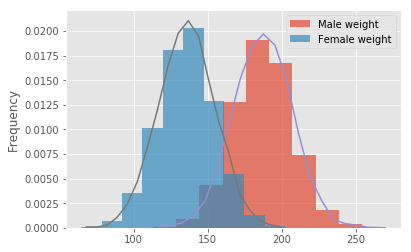

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\Devindra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Devindra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Comparing Heights')

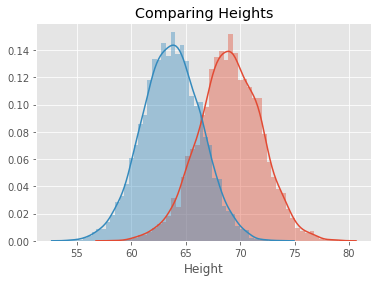

In [32]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.